In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import numpy as np
import scipy.stats as stats
import scipy.signal
import numpy.matlib
import scipy.io
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm 
from matplotlib import colors as mcolors

In [9]:
import re
import os
import sys

In [13]:
sys.path.append('../')

In [36]:
from src.models import train_model
from src.features import build_features
from src.visualization import visualize

In [56]:
# setting up parameters
params={'res':2, 'block_width': 54 }
params['gauss_width']=10 * params['res']
params['methods']=['frobenius', 'diff_frobenius']#'pop_sum', 'mean', 'diff_base', 'variation', 
res=params['res']
block_width=params['block_width']
gauss_width=params['gauss_width']

In [ ]:
# retinal data properties
stim_categories={'white': 3, 'fullfield' :0, 'multiscale':1, 'spatexp':2, 'spattempexp':2,'tempexp':4, 'natmov':1, 'scramnat':3, 'lowcont_white':3, 'lowcont_multiscale':1 }
firebrick=mcolors.CSS4_COLORS['firebrick']
red=mcolors.CSS4_COLORS['red']
coral=mcolors.CSS4_COLORS['coral']
seagreen=mcolors.CSS4_COLORS['seagreen']
grey=mcolors.CSS4_COLORS['grey']
royalblue=mcolors.CSS4_COLORS['royalblue']
color_ctgry=(grey, royalblue, red, coral, seagreen)
spat_corr={'grey': 'None', 'royalblue': 'Delta---', 'red':'Delta--', 'coral':'Delta-', 'seagreen':'None+' }

In [29]:
dir=r'../Data/external/'
data_files=os.listdir(path=dir)

In [30]:
data_files

['.gitkeep',
 'data_02_16_12_t2.mat',
 'data_02_16_12_t9.mat',
 'data_02_18_10_t1.mat',
 'data_02_26_12_t2.mat',
 'data_02_26_12_t8.mat',
 'data_03_04_12_t12.mat',
 'data_03_04_12_t2.mat',
 'data_03_04_12_t7.mat',
 'data_03_13_12_t10.mat',
 'data_03_13_12_t2.mat',
 'data_03_13_12_t6.mat',
 'data_03_17_13_t11.mat',
 'data_03_17_13_t2.mat',
 'data_03_25_12_t11.mat',
 'data_03_25_12_t2.mat',
 'data_04_18_13_t2.mat',
 'data_05_08_13_t12.mat',
 'data_05_08_13_t15.mat',
 'data_05_08_13_t5.mat',
 'data_05_09_13_t12.mat',
 'data_05_09_13_t9.mat',
 'data_06_11_13_t2.mat',
 'data_06_11_13_t5.mat',
 'data_06_11_13_t8.mat',
 'data_06_27_12_t14.mat',
 'data_06_27_12_t8.mat',
 'data_06_28_13_t2.mat',
 'data_06_28_13_t6.mat',
 'data_06_28_13_t9.mat',
 'data_07_06_12_t12.mat',
 'data_07_06_12_t3.mat',
 'data_07_10_13_t8.mat',
 'data_08_09_12_t2.mat',
 'data_09_05_12_t5.mat',
 'data_09_27_12_t11.mat',
 'data_09_27_12_t2.mat',
 'data_10_21_10_t2.mat',
 'data_11_15_12_t2.mat',
 'data_12_06_12_t6.mat',
 '

WARNING    ../src/features/build_features.py:24: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  discrete_spikes[spike_times]=1
 [py.warnings]
WARNING    ../src/features/build_features.py:26: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future
  return discrete_spikes
 [py.warnings]


(33, 1235092)
(22872, 33, 33)
(33, 1235092)
(22872, 33, 33)


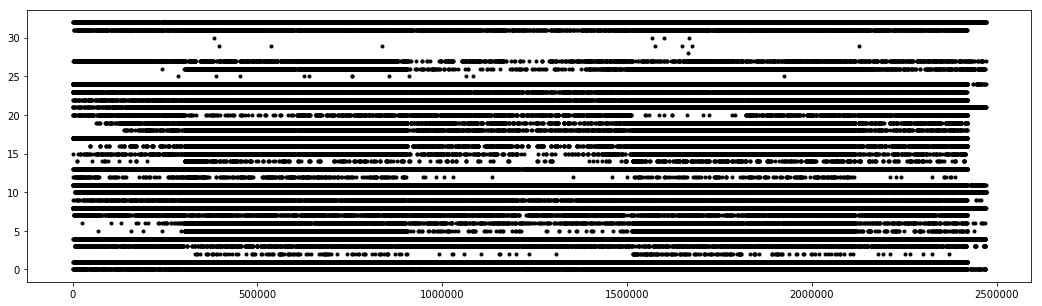

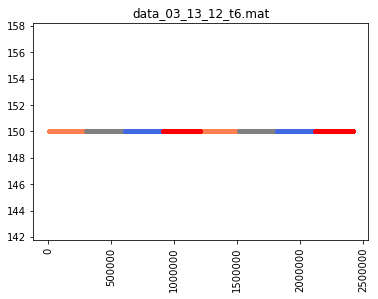

In [59]:
file='data_03_13_12_t6.mat'
#file='data_03_13_12_t2'
data_retina=scipy.io.loadmat(dir+file)
data_retina['file']=file
sum_diff_corr, stim=train_model.detect_changes(data_retina, params)

WARNING    /Users/abhinav/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
 [py.warnings]


white64_a
fullfield_a
multiscale64_g
white64_b
fullfield_b
multiscale64_h
spatexp64_a
spatexp64_b
white64_a
fullfield_a
multiscale64_g
white64_b
fullfield_b
multiscale64_h
spatexp64_a
spatexp64_b


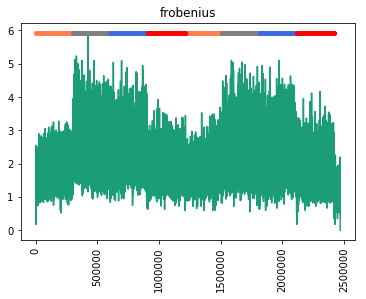

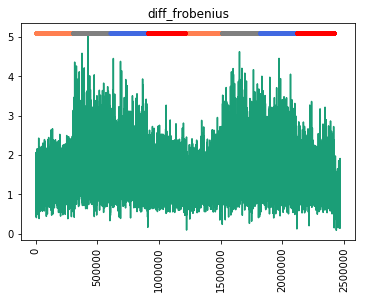

In [60]:
visualize.plot_cp_results(sum_diff_corr,stim, data_retina, params)

In [62]:
from changepy import pelt
from changepy.costs import normal_mean, poisson, exponential

In [65]:
sum_diff_corr

{'diff_frobenius': array([ 0.49842189,  1.20465123,  0.80217495, ...,  0.92832834,
         0.7967273 ,  1.17155934]),
 'frobenius': array([ 1.03552928,  0.92755303,  1.33932267, ...,  0.54698381,
         1.17155934,  0.        ])}

In [66]:
summary_stat=sum_diff_corr['diff_frobenius']
pelt(poisson(summary_stat), len(summary_stat))

[0, 2803, 5574, 5612, 8384, 14022, 16797, 16830, 19607, 19639, 22409]

In [68]:
pelt(exponential(summary_stat), len(summary_stat))

[0, 2803, 8384, 14022, 19596, 22409]

In [67]:
summary_stat.shape

(22871,)